# Assignment 3
### Question 1 - non CNN models

This section of the assignment focuses on implementing non - CNN methods on the dataset to classify it into its defined categories.

The dataset is fashion MNIST with 786 columns and 60,000 observations. Due to the large size of data and incompatible system configuration, the implementation was moved to google colabs. This dataset is the representation of five different kinds of fashion items. Each row represents one fashion item and every column of the row stores the pixel value used to generate the image of the fashion item. Based on these values, we have to classify the data into 5 distinct categories.
 
The different methods used for implementation and the reasons why, have been discussed along with the code snippets, combining all the questions asked in the assignment.

Also, some sections had to interrupt when executing the second time due to long hours they were taking for implementation.

In [1]:
import matplotlib as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv("train.csv",header=0)
test_data = pd.read_csv("testX.csv", header=0)
print(dataset)

          Id  Label  1  2  3  4  5  6  7  8  ...  775  776  777  778  779  \
0      10000      4  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
1      10001      0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
2      10002      0  0  0  0  0  0  0  0  0  ...   31    9    0    0    0   
3      10003      4  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
4      10004      1  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
...      ...    ... .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...   
59995  69995      3  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
59996  69996      0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
59997  69997      4  0  0  0  0  0  0  0  0  ...   27    0    0    0    0   
59998  69998      0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
59999  69999      2  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   

       780  781  782  783  784  
0        0    0    0    0    0  
1        

The implementation started with loading the train and test dataset. The test dataset had 10,000 observations on which the accuracy of the model was calculated. The train dataset was then split into train and validation set(10% of the total data), to check the validity of the model before running it on the test data. The data was transformed into a 28X28 matrix to generate the images for better visual understanding using imshow()(results in part b of the assignment)

In [0]:
X = dataset.iloc[:,2:].values #all columns except the last one
y = dataset.iloc[:,1].values #only the last column
X_test = test_data.iloc[:,1:]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.1)

Once the train, validation and test sets were made, it was then preprocessed. For preprocessing, a subset of minmax preprocessing and zscore normalization was chosen. The major difference between the two is that the zscore centers the data by subtracting the mean and dividing by standard deviation(sets the overall mean as zero and standard deviation as one) whereas, minmax scaler rescales the data by setting minimum to 0 and maximum to 1(by default) and all the other values scale accordingly. The end goal is to maximize the variance such that dimensionality reduction could work better. For this, if we go by values itself, we would be able to distinguish by the fact that minmax ranges the data between 0 and 1 whereas standardscaler has ~68% data ranging between -1 and 1 and ~95% between-1.96 and 1.96, which shows that data is more widespread in standardscaler than in minmax.

The values for each column range between 0 and 255. Since the distinguishing factor between the classes would be the pixel intensities at different points, therefore, scaling them using Standard Scaler would be better as it would evenly distribute the intensities making darker pixels darker and lighter more lighter. Also, minmax is more sensitive to noisy data, hence if there is noise in data then it would impact the over scaling of the set.


In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [0]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)
X_val = mm_scaler.transform(X_val)
X_test = mm_scaler.transform(X_test)

Once the data is preprocessed, the next step is to model the data. But due to the large size of the columns, the computational time and complexity increases to a great extent. To resolve this issue, the dimensionality of the data is reduced making sure that the information is not lost. To reduce the dimensionality, the following methods were taken into consideration(taking forward the methods described in assignment 2): 
1. PCA
2. LDA
3. Isomap
4. LocallyLinearEmbedding
5. SpectralEmbedding
6. t-SNE. 

Out of all the methods for dimensionality reduction, t-SNE performed the best when the data had to be classified. But when talking about time complexity the best performance was given by PCA(least time), LDA and the other methods. When we bring time complexity as a factor for evaluation, then t-SNE should be rejected as it took ~8 hours to compute the model whereas PCA took ~321 seconds to generate the results(when n_componenets were not specified). Hence PCA was a better option than any other method. 

Also, when the graphs of the results were compared, t-SNE did not provide stability in classification. Once it was pretty much seperable whereas on second run PCA seemed to classify better.

Also, only t-SNE was tested for that long. The other methods were interrupted inbetween because there performance had been tested during assignment 2 and on evaluation only t-SNE had seemed to outperform all of them in terms of classification as it preserves the local distances between the neighbours. When the dataset is smaller then, t-SNE could be considered but for cases such as this, time complexity plays an important role and cannot be ignored. Therfore, PCA seemed to be the best option available. 

In [7]:
%%time
from sklearn.decomposition import PCA
transformer = PCA(n_components=2,random_state=42) 
X_transformed_PCA = transformer.fit_transform(X_train)

CPU times: user 3.85 s, sys: 316 ms, total: 4.17 s
Wall time: 2.26 s


In [8]:
%%time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
transformer = LDA(n_components=2) 
X_transformed_PCA = transformer.fit_transform(X_train,y_train)

CPU times: user 23.8 s, sys: 1.12 s, total: 25 s
Wall time: 15 s


In [0]:
%%time 
from sklearn.manifold import Isomap 
embedding = Isomap(n_components=2) 
X_transformed_Isomap = embedding.fit_transform(X_train)

In [0]:
%%time 
from sklearn.manifold import LocallyLinearEmbedding 
embedding = LocallyLinearEmbedding(n_components=2,random_state=42) 
X_transformed_LocallyLinearEmbedding = embedding.fit_transform(X_train)

In [0]:
%%time 
from sklearn.manifold import SpectralEmbedding 
embedding = SpectralEmbedding(n_components=2,random_state=42) 
X_transformed_SpectralEmbedding = embedding.fit_transform(X_train)

In [0]:
%%time 
from sklearn.manifold import TSNE 
embedding = TSNE(n_components=2,random_state=42) 
X_transformed_TSNE = embedding.fit_transform(X_train)

Finally PCA was chosen over other methods, as can be observed from the runtimes of the methods. Most of them had to be interrupted because of large dataset.



In [0]:
#applying PCA on the dataset
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(random_state=42,n_components=10)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)


Once the data is processed and its dimensionality is reduced, then various methods of classification are tested to shortlist the ones that perform well on the dataset. To get quicker results, the number of components for PCA were set to 10 as it covers more than 70% of the variance explained by the model. Using this data, the number of columns are reduced to 10 thereby making computation simpler and quicker.

Logistic regression works on probability function checking whether the data belongs to a particular class or not. This turn out to not be a good method as it stopped beyond certain number of iterations.

In [6]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_val, y_val)))

Accuracy of Logistic regression classifier on training set: 0.64
Accuracy of Logistic regression classifier on test set: 0.63


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Decision Tree classifier classifies the data into groups of data that can be categorised later. This model helps in finding patterns in data and categorizing them into leaves of different classes. The leaf branches define the properties that lead to the categorization. 

The decision tree model is very easy to overfit. As the depth of the tree increases, the patterns are further disintegrated into subsets which might work well for the train model but misclassify the validation/test model. More depth makes the model more prone to noise and hence the model becomes overfit. Extremely small values result in underfitting as well as it is unable to break down the model into desired number of classes.

For testing phase, default values were considered. Even when the max_depth was altered the performance did not improve beyond 85% on the validation data at max_depth = 45. Beyond this, a decrease in accuracy was observed.

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_val, y_val)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.81


The KNN model takes into consideration k nearest neighbours for each point to classify it into one of the defined groups. The class that has its maximum data elements near the point under consideration will have the point under its domain. To avoid tie, odd numbers are preferred but that is usually the case when there are two classes. The parameters that can be tunned for better performamce are k neighbors.

Greater the K smoother the boundry( removal of noise) but higher the chances of misclassification(underfitting). Lower value of K can have a lot of noise that will have higher influence on the dataset(overfitting). Both of these lead to lower accuracy on the validation/test data. Another factor is the computational complexity, which is lower for smaller value of k and higher for higher value of K. 

For this model, we are choosing the default values set for KNN.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_val, y_val)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.85


Support Vector Machine tries to find a hyperplane that correctly classifies the data into one of the defined groups. The goal of SVM is to maximize the distance between the hyperplanes making sure that it does not misclassifiy the data.  

C value is the regularization parameter that determines the distance between the hyperplanes. If the value of C is small, then the distance between the hyperplanes will be larger. This will result in underfitting of the data and it may misclassify some data. If the value of C is larger, then the distance between the hyperplanes will be smaller. This will result in overfitting of the data as it will try to accommodate as many class datapoints as it could to avoid misclassification. This will result in high training accuracy but lower test accuracy.

This model was tested for default values when comparing to other models.

In [9]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_val, y_val)))

Accuracy of SVM classifier on training set: 0.85
Accuracy of SVM classifier on test set: 0.85


XGBoost is an improvised version of gradient Tree boosting and AdaGrad. It is basically a decision tree based ensemble that works on Gradient boosting framework. It has various additional functionalities when it comes to unstructured data. It improvises the time and computational power making non-CNN work better. Results show that it has outperformed Gradient boosting, Random forest and Logistic Regression. For xgboost, various parameters can be altered such as n_estimators, max_depth, learning rate etc. It is said that XGBoost performs better than any classification algorithm in terms of time complexity.

It involves the process of improving the performance of the model by fiting the new tree on the old one. It updates the tree to make it more effective and accurate. This model is usually prone to overfitting if the number of trees are very larger. For smaller values, as the trees increase, the accuracy improves as well but beyond certain value it starts getting influenced by the noisy data and we observe a dip in the performance.

In [12]:
#xgboost
import xgboost as xgb
model=xgb.XGBClassifier()
model.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(model.score(X_val, y_val)))

Accuracy of SVM classifier on training set: 0.81
Accuracy of SVM classifier on test set: 0.80


From all the above methods, logistic regression was eliminated because of low accuracy. The others were hypertuned one by one for most accuaret results. 


Now the number of components for PCA were set to 150 so that they cover more than 90% of the variance explained by the model. The train, val and test generated were passed through the approved models to check for model accuracy.

In [0]:
#applying PCA on the dataset
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(random_state=42,n_components=150)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
k_list=[50,100,250,500,1000]
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
  print('Accuracy of K-NN classifier on test set: {:.2f}'
      .format(knn.score(X_val, y_val)))

When the values for KNN were hypertuned, the maximum accuracy that was obtained was 86.69% for test data. 

Lower value of k results in overfitting of the model because it is highly prone to noisy data and has less number of data elements to compare the datapoint with to correctly classify it to the right right class( misclassification of the data) But in our case the smallest value chosen is the optimal choice. Higher value of k results in underfitting the model because it has way too many data elements to comapre the datapoint with that the distinction between the nearest and not so near elements becomes blurry. This will again result in misclassification of data and in many cases may output classes that have dominance in the dataset. When choosing an optimal value of K, it should be larger enough to minimize the noise in the data and small enough to avoid misclassification of data. 


In [13]:
#xgboost
import xgboost as xgb
import time
model=xgb.XGBClassifier(eta=0.3, max_depth=40, seed=42, min_child_weight=300, objective='multi:softmax')
start_time=time.time()
model.fit(X_train, y_train)

print('Accuracy of XGBoost classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print(time.time()-start_time)
print('Accuracy of XGBoost classifier on test set: {:.2f}'
     .format(model.score(X_val, y_val)))
print(time.time()-start_time)

Accuracy of XGBoost classifier on training set: 0.88
667.6143534183502
Accuracy of XGBoost classifier on test set: 0.86
667.8802578449249


The accuracy obtained for XGBoost was lower than expected. With the advantages available, it could easily outperform the other algorithm. But there are so many parameters that need to be tuned as a result of which some combinations which perform well are left out. This combination had performed better than any of the others that have been tried so far. There are many more that can outperform these parameters. The general observations were as follows:
1. Smaller values of eta resulted in more time consumption than required.
2. Max_depth was tested for range 20-50, with better accuracy at 45 beyond which decrease in accuracy was observed
3. n_estimators were checked between 100-500 with better results at 300 beyond which decrease in accuracy was observed
4. objective was set to multi:softmax. 

Yet the results were nor any better than SVM but rather had similar observations. Even the time taken for computation was more for XGBoost. It was expected that the time taken would be least in this case. Even the accuracies were lower than SVM. Since SVM outperformed XGBoost, therefore, XGBoost was dropped.

In [14]:
from sklearn.svm import SVC
gamma=[0.001,0.01,0.05,1]
C=[1,5,10,100,500]
# These were the combinations that were tested repeatedly. GridSearch was taking longer than expected, hence the results have not been included. 
# The code has been commented. It can be uncommented and tested to view the results.
# parameters = {'gamma'=[0.001,0.01,0.05,1], 'C':[1,5,10,20,100]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters)
# clf.fit(X_train, y_train)
# The best outcome has been written below:
svm = SVC(gamma=0.001, C = 10, kernel='rbf')
import time
start_time = time.time()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print(time.time()-start_time)
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_val, y_val)))
print(time.time()-start_time)

Accuracy of SVM classifier on training set: 0.94
580.9654021263123
Accuracy of SVM classifier on test set: 0.89
612.8806030750275


SVM has been able to outperform all the other classification models tested so far. The maximum accuracy reported on the test data is 89.2%(reported for 50% of the data). As defined above, the following parameters were hypertuned. The kernel was set to 'rbf' as linear took a lot of time to compile the results and the difference in the accuarcy of test result was also marginal. For the other parameters, the model performed the best at c=10 and gamma=0.001.

The factors that determine which c value is the best are:
1. to have hyperplanes that do not misclassify the data
2. to have the largest minimum margin between hyperplanes

C at 10 and 100 had minimal difference when the results were compared. Rather a slight dip in the accuracy for c=100 was observed. also considering the above statements, we can say that '10' best satisfies the purpose of the model as it would have similar misclassification as 100 and will have larger margin between the hyperplanes as compared to 100.

Also, having lower curvature gave better results than higher gamma value which suggests that data is not wide spread, hence having lower curvature better performs on the results.

The time recorded for calculating training accuracy and test accuarcy was better than XGBoost, therefore, we can say that SVM outperforms all the other models and their constraints that were tested on the dataset.

The runtime for fitting the model and calculating the accuracy of training model was ~580 seconds.

The accuracy obtained for training was maximum for c=10 and gamma =0.01 and was equal to 94% with validation accuracy as 89%. For other combinations, training accuracy was 91% and below with validation accuracy 88% and below.

In [15]:
%%time
y_test_svm=svm.predict(X_test)
print(y_test_svm)

[3 4 0 ... 3 2 2]
CPU times: user 53.1 s, sys: 10 ms, total: 53.2 s
Wall time: 53.2 s


SVM was chosen as the most optimal model and was used to predict the results of test model. 

The runtime of calculating test results is 53.2 seconds

In [16]:
result = pd.DataFrame((y_test_svm),columns = ['Label'])
Id = pd.read_csv('testX.csv')[['Id']]
submission = pd.concat([Id,result], axis=1)
submission.columns = ['Id', 'Label']
submission.to_csv('submission(svm).csv',index=False)

print(submission)

        Id  Label
0        0      3
1        1      4
2        2      0
3        3      1
4        4      1
...    ...    ...
9995  9995      1
9996  9996      1
9997  9997      3
9998  9998      2
9999  9999      2

[10000 rows x 2 columns]


ROC is used to check the sensitivity of the datapoints against the decision boundry. The closer they are to the top left corner, the better the results are as they correspond to more area under the curve. The greater the area captured by the curve, the better as the area represents the random points for which the results would be true positives and the are outside the curve are the ones for which the results would be false positives.

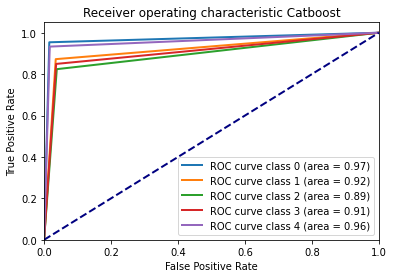

In [12]:
# for ROC curve 
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred = y_test_svm
y_pred = label_binarize(y_pred,classes=[0,1,2,3,4])

y_test = label_binarize(y_val,classes=[0,1,2,3,4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0],lw=lw, label='ROC curve class 0 (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1],lw=lw, label='ROC curve class 1 (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2],lw=lw, label='ROC curve class 2 (area = %0.2f)' % roc_auc[2])
plt.plot(fpr[3], tpr[3],lw=lw, label='ROC curve class 3 (area = %0.2f)' % roc_auc[3])
plt.plot(fpr[4], tpr[4],lw=lw, label='ROC curve class 4 (area = %0.2f)' % roc_auc[4])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC SVM')
plt.legend(loc="lower right")
plt.show()

Class 0 captures maximum area followed by class 4, class 1, class 3 and minimum by class 2. From this we can say that class 0 will have more true positive than any other classes.


Questions stated in the assignment:
1. Explanation of Design and implementation of choices of your models - all the models that were considered during the execution of the model have been explained along with the code snippets.
2. Implementation of design choices - All the choices that were made have there codes snippets along with explanation.
3. Kaggle Competition Score - 89.180%
4. Results Analysis:
        a. Runtime performance: 
        Training - 580 seconds, validation prediction - 37 seconds, test prediction - 41.3 seconds.
        b. Comparision of different algorithms and parameters: 
        For algorithm, all the combinations of parameters that were tried have been stated. The results between different algorithms was distinguished based on test accuracy and time taken to produce results.
    For preprocessing - Standard Scaler was chosen over MinMax: The major difference between the two is that the zscore centers the data by subtracting the mean and dividing by standard deviation(sets the overall mean as zero and standard deviation as one) whereas, minmax scaler rescales the data by setting minimum to 0 and maximum to 1(by default) and all the other values scale accordingly. The end goal is to maximize the variance such that dimensionality reduction could work better. For this, if we go by values itself, we would be able to distinguish by the fact that minmax ranges the data between 0 and 1 whereas standardscaler has ~68% data ranging between -1 and 1 and ~95% between-1.96 and 1.96, which shows that data is more widespread in standardscaler than in minmax.
    Also, when tested on SVM, the accuarcy from minmax was 20% for validation set and 89% from StandardScaler
    For dimensionality reduction: out of two major sub selections - PCA and t-SNE, PCA was chosen based on the plots generated and time taken to compile results. t-SNE should be rejected as it took ~8 hours to compute the model whereas PCA took ~321 seconds to generate the results(when n_componenets were not specified). Hence PCA was a better option than any other method.
    For classification: out of KNN, XGBoost and SVM, SVM was chosen as the SVM generated maximum model accuracya nd took least time out of the three models to generate results. The hyperparameter tuning of each of the algorithms have been discussed above in detail. The time taken and the accuarcy generated have been staed alongside.
        c. Explanation of your model: 
    Support Vector Machine tries to find a hyperplane that correctly classifies the data into one of the defined groups. The goal of SVM is to maximize the distance between the hyperplanes making sure that it does not misclassifiy the data. SVM has been able to outperform all the other classification models tested so far. The maximum accuracy reported on the test data is 89.2%(reported for 50% of the data). As defined above, the following parameters were hypertuned. The kernel was set to 'rbf' as linear took a lot of time to compile the results and the difference in the accuarcy of test result was also marginal. For the other parameters, the model performed the best at c=10 and gamma=0.001.

    The factors that determine which c value is the best are:

    to have hyperplanes that do not misclassify the data
    to have the largest minimum margin between hyperplanes
    C at 10 and 100 had minimal difference when the results were compared. Rather a slight dip in the accuracy for c=100 was observed. also considering the above statements, we can say that '10' best satisfies the purpose of the model as it would have similar misclassification as 100 and will have larger margin between the hyperplanes as compared to 100.

    Also, having lower curvature gave better results than higher gamma value which suggests that data is not wide spread, hence having lower curvature better performs on the results.

    The time recorded for calculating training accuracy and test accuarcy was better than XGBoost, therefore, we can say that SVM outperforms all the other models and their constraints that were tested on the dataset.

    The runtime for fitting the model and calculating the accuracy of training model was ~580 seconds.

    The accuracy obtained for training was maximum for c=10 and gamma =0.01 and was equal to 94% with validation accuracy as 89%. For other combinations, training accuracy was 91% and below with validation accuracy 88% and below.
        d. ROC Curve: 
        The plot along with its explanation has been stated above.
        e. Evaluate your code: 
        The code has been split into 90-10 ratio for comparision. The training data has been tested on various hyperparameters and best results ahve been calculated.
    The accuracy obtained for training was maximum for c=10 and gamma =0.01 and was equal to 94% with validation accuracy as 89%. For other combinations, training accuracy was 91% and below with validation accuracy 88% and below.